# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>


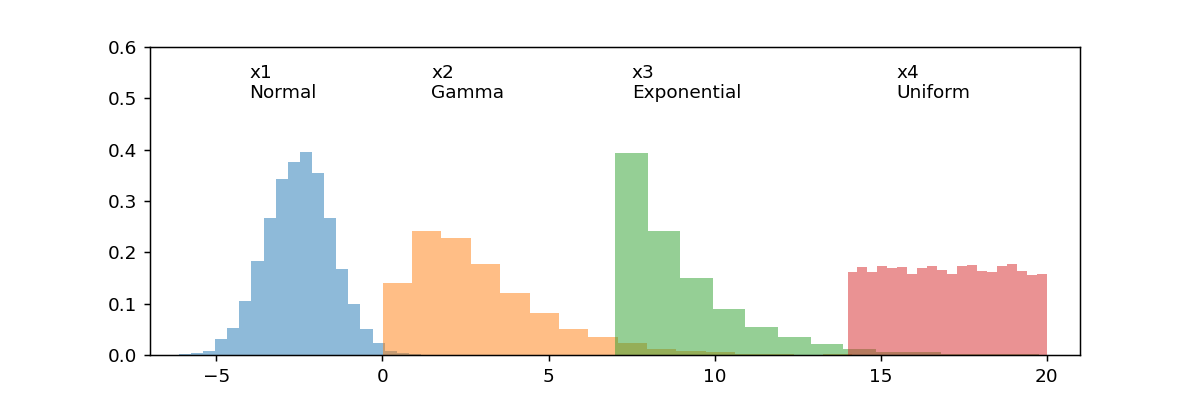

<IPython.core.display.Javascript object>

In [38]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook
%load_ext nb_black

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000) + 7
x4 = np.random.uniform(14, 20, 10000)

# plot the histograms
plt.figure(figsize=(9, 3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5)
plt.axis([-7, 21, 0, 0.6])

plt.text(x1.mean() - 1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean() - 1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean() - 1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean() - 1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


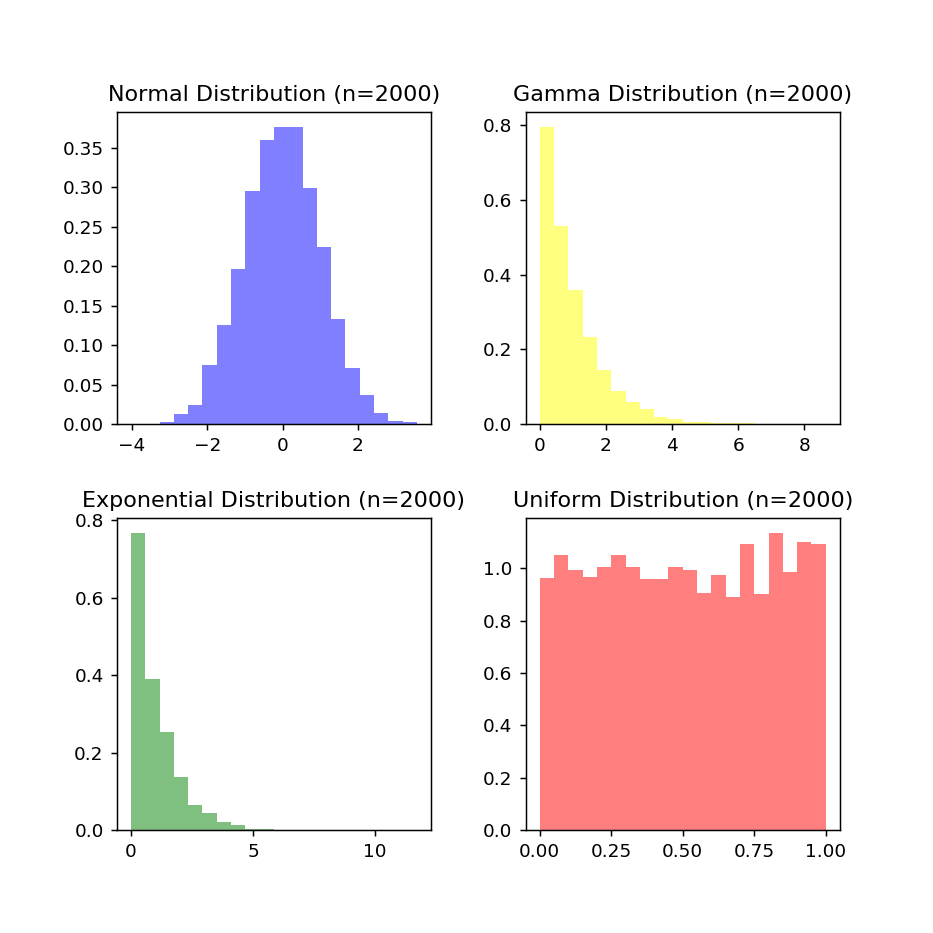

<IPython.core.display.Javascript object>

In [39]:
import matplotlib.animation as animation

n_frames = 20
frame_size = 100


def get_data(size=frame_size):
    return {
        'normal': np.random.normal(0.0, 1.0, size),
        'gamma': np.random.gamma(1.0, 1.0, size),
        'exponential': np.random.exponential(1.0, size),
        'uniform': np.random.uniform(0.0, 1.0, size)
    }


class Distribution(object):
    def __init__(self, name, axis, color, data=[]):
        self.name = name
        self.axis = axis
        self.color = color
        self.data = data

    def update_hist(self, data):
        self.data = np.concatenate((self.data, data))
        return self.axis.hist(
            self.data, bins=20, normed=True, color=self.color, alpha=0.5
        )


# Setup figure & data
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

distributions = [
    Distribution('normal', ax1, 'blue'),
    Distribution('gamma', ax2, 'yellow'),
    Distribution('exponential', ax3, 'green'),
    Distribution('uniform', ax4, 'red')
]


# setup animation
def update(curr):
    artists = []
    data = get_data()
    for d in distributions:
        d.axis.cla()
        d.axis.set_title(
            "{} Distribution (n={})".format(
                d.name.capitalize(), (curr + 1) * frame_size
            )
        )
        artists.append(d.update_hist(data[d.name]))

    return artists


a = animation.FuncAnimation(
    fig, update, frames=n_frames, interval=100, blit=True, repeat=False
)

In [40]:
# save animation as gif
# bitrate=4.5 Mbit/s, YouTube 1080p videos - https://en.wikipedia.org/wiki/Bit_rate#Video
# dpi=300,
a.save(
    'assignment3_a.gif',
    writer='imagemagick',
    dpi=300,
    bitrate=int(1024 * 1024 * 4.5)
)

<IPython.core.display.Javascript object>